In [1]:
%matplotlib inline
import matplotlib, qiskit, pprint
from matplotlib import pyplot as plt
import numpy as np
from numpy import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, IBMQ, transpile, schedule, assemble
from qiskit.providers.aer import QasmSimulator
from qiskit.test.mock import FakeAlmaden, FakeMelbourne
from qiskit.visualization import *


# load account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
# simulators:
f_alma = FakeAlmaden() # simulator f_alma for pulse schedules
f_mel = FakeMelbourne() # simulator f_mel for simulator backend mel
qasm_simulator = Aer.get_backend('qasm_simulator') 

In [2]:
from qiskit.algorithms import Grover
from qiskit.circuit.library import GroverOperator

In [7]:
# import custom modules:

from circ_utils import *

from operator_3q_lib import *

# SWAP entanglement

# Test for Alice Qubit in Zero State


 Fidelity Bob Qubit: 	51.58%

 Fidelity Bob Partner: 	53.01%

 Fidelity Base Middle Pair a: 	95.95%

 Fidelity Base Middle Pair b: 	87.51%


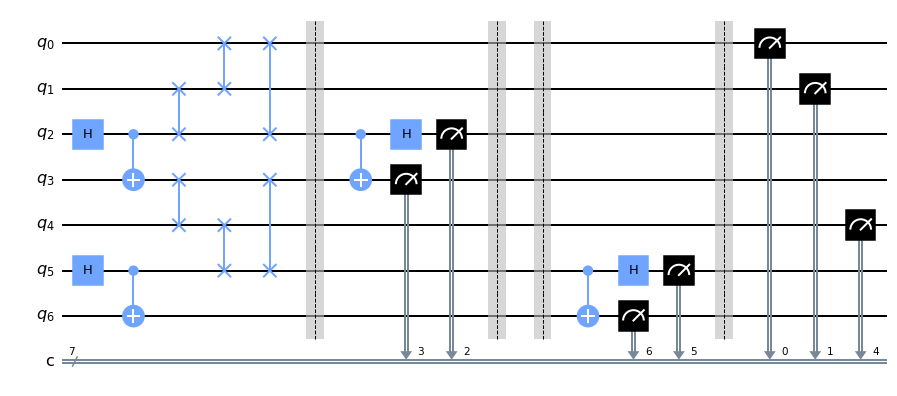

In [94]:
alice_initital_state = "0"

# set number of qubits
n = 7
# circ 
circ_0 = QuantumCircuit(n,n)
bell_pairs = get_bell_pairs(circ_0)
# pairs for mesurements
basemeas = bell_pairs[0]
bob_pair = bell_pairs[-1]
# inums for results
meas_a_i, meas_b_i = -1 * (basemeas[0]+1), -1 * (basemeas[1]+1)
bob_imeas, bob_pmeas = 0,1  

# apply protocol

# entangle middle EPR pair and bobs EPR pair
entangle_bell_pairs(circ_0, [[2,3],[5,6]])

# straight forward entanglement growth via swap gates
for pair in [[2,1],[1,0],[0,2],[3,4],[4,5],[3,5]]:
    circ_0.swap(pair[0],pair[1])

# measurements
insert_bell_measurement(circ_0,[2,3])
insert_bell_measurement(circ_0,[5,6])
for i in [0,1,4]:
    circ_0.measure(i,i)

# run on simulator
be = f_alma
pct = 100
shots = 100*pct
qobj = assemble(circ_0, shots=shots)
result_0 = be.run(qobj).result()
counts_0_state = result_0.get_counts()
exi_counts_0_state = get_exited_state_dist(result_0, num_qubits=7)

# see results 
bob_meas_1  = sum([v for (k,v) in counts_0_state.items() if k[bob_imeas]== alice_initital_state])
bob_p_meas_1 = sum([v for (k,v) in counts_0_state.items() if k[bob_pmeas]==alice_initital_state])
meas1_1 = sum([v for (k,v) in counts_0_state.items() if k[meas_a_i]==alice_initital_state])
meas2_1 =  sum([v for (k,v) in counts_0_state.items() if k[meas_b_i]==alice_initital_state])

print("\n Fidelity Bob Qubit: \t{}%".format(bob_meas_1/pct)) 
print("\n Fidelity Bob Partner: \t{}%".format(bob_p_meas_1/pct)) 
print("\n Fidelity Base Middle Pair a: \t{}%".format(meas1_1/pct)) 
print("\n Fidelity Base Middle Pair b: \t{}%".format(meas2_1/pct)) 

circ_0.draw('mpl')

# Test for Alice Qubit in One State


 Fidelity Bob Qubit: 	48.61%

 Fidelity Bob Partner: 	46.99%

 Fidelity Base Middle Pair a: 	44.95%

 Fidelity Base Middle Pair b: 	53.94%


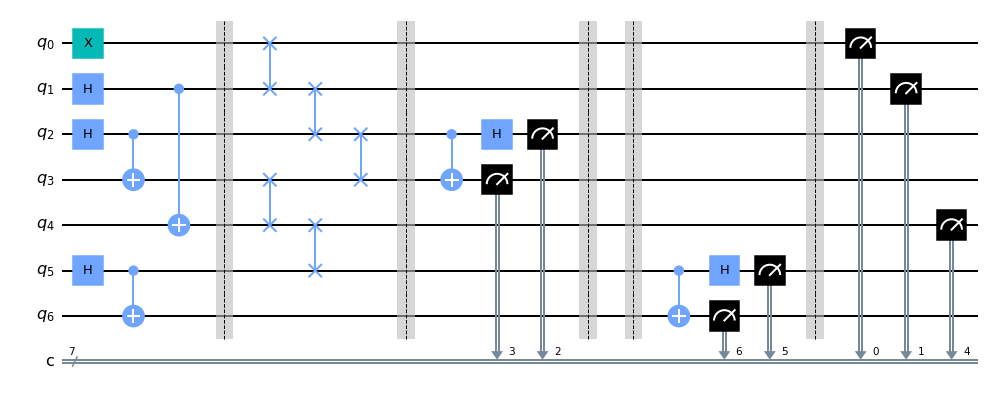

In [107]:
alice_initital_state = "1"

# set number of qubits
n = 7
# circ 
circ_1 = QuantumCircuit(n,n)
bell_pairs = get_bell_pairs(circ_1)
# pairs for mesurements
basemeas = bell_pairs[0]
bob_pair = bell_pairs[-1]
# inums for results
meas_a_i, meas_b_i = -1 * (basemeas[0]+1), -1 * (basemeas[1]+1)
bob_imeas, bob_pmeas = 0,1


# initialice alice in |1>
circ_1.x(0)
    
# entangle middle EPR pair and bobs EPR pair
entangle_bell_pairs(circ_1, [[2,3],[5,6],[1,4]])

circ_1.barrier()

# straight forward entanglement growth via swap gates
for pair in [[1,0],[2,1],[3,4], [4,5],[2,3]]:
    circ_1.swap(pair[0],pair[1])

# measurements
insert_bell_measurement(circ_1,[2,3])
insert_bell_measurement(circ_1,[5,6])
for i in [0,1,4]:
    circ_1.measure(i,i)
       
# run on simulator
be = f_alma
pct = 100
shots = 100*pct
qobj = assemble(circ_1, shots=shots)
result_1 = be.run(qobj).result()
counts_1_state = result_1.get_counts()
exi_counts_1_state = get_exited_state_dist(result_1, num_qubits=7)

# see results 
bob_meas_1  = sum([v for (k,v) in counts_1_state.items() if k[bob_imeas]== alice_initital_state])
bob_p_meas_1 = sum([v for (k,v) in counts_1_state.items() if k[bob_pmeas]==alice_initital_state])
meas1_1 = sum([v for (k,v) in counts_1_state.items() if k[meas_a_i]==alice_initital_state])
meas2_1 =  sum([v for (k,v) in counts_1_state.items() if k[meas_b_i]==alice_initital_state])

print("\n Fidelity Bob Qubit: \t{}%".format(bob_meas_1/pct)) 
print("\n Fidelity Bob Partner: \t{}%".format(bob_p_meas_1/pct)) 
print("\n Fidelity Base Middle Pair a: \t{}%".format(meas1_1/pct)) 
print("\n Fidelity Base Middle Pair b: \t{}%".format(meas2_1/pct)) 

circ_1.draw('mpl')

# Compare number of exited states in results

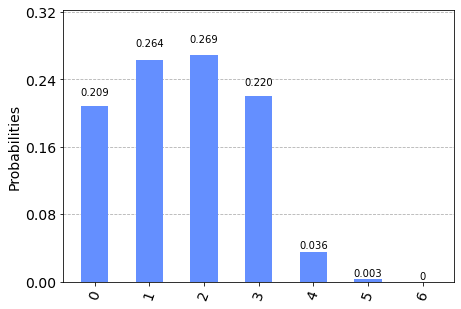

In [95]:
plot_histogram(exi_counts_0_state)

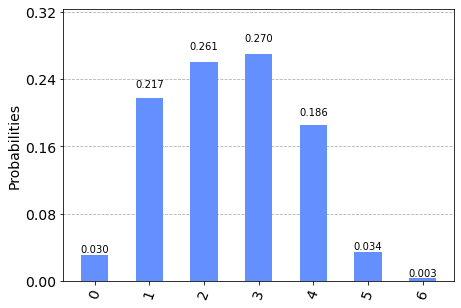

In [96]:
plot_histogram(exi_counts_1_state)